# Question: Predicting Customer Purchasing or Not

Description:Using Logistic Refression to predict the customers will buy the product or not (Binary Classification) from customers dataset 
(Please refer to file: purchasing_data.csv in the file forder )

## Step 1: Import the needed tools and datasets
Firstly, import all tools and dataset you need, including the the tools for manage dataframe, drawing the plot, the model constructing tools from scikit-learn, and the metrix for showing the accuacy rate.
As the dataset shows, the there are 5 columns in the dataframe. "Gender", "Age" and "EsimatedSalary" are the Characteristic Variable, which representing the Variable X. The column of "Purchased" is Target Variable, representing the Variable y.


In [1]:
#import needed tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#import datasets
df = pd.read_csv('purchasing_data.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15566689,Female,35,57000,0
1,15569641,Female,58,95000,1
2,15570769,Female,26,80000,0
3,15570932,Male,34,115000,0
4,15571059,Female,33,41000,0
...,...,...,...,...,...
345,15779581,Male,29,43000,0
346,15779744,Male,38,71000,0
347,15779862,Male,29,61000,0
348,15780572,Female,50,88000,1


## Step 2: Data pre-processing
After checking there is no Null in the dataframe, the column of "Gender" should be re-organized to have dummy variable, Male as 0, and Female as 1.
The the train and test data should be seperated, with using the common function "train_test_split." Also, the variable X should be standarlized since the values in each columns has large range and different standard. 

In [3]:
#check null data
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
345,False,False,False,False,False
346,False,False,False,False,False
347,False,False,False,False,False
348,False,False,False,False,False


In [4]:
#gender get dummy
label_encoder = preprocessing.LabelEncoder()
GenderN = label_encoder.fit_transform(df["Gender"])
GenderN

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [5]:
#split train & test / x & y 
x = df.iloc[:, 2:4]
y = df.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 66)
x_train

,Age,EstimatedSalary
82,23,28000
239,41,63000
136,37,71000
300,37,70000
36,39,106000
...,...,...
122,46,79000
51,30,80000
119,22,18000
316,18,44000


In [6]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train

array([[-1.38878349, -1.2212182 ],
       [ 0.32844329, -0.16564549],
       [-0.05316266,  0.07562827],
       [-0.05316266,  0.04546905],
       [ 0.13764031,  1.13120098],
       [-0.81637456, -0.76882989],
       [-1.67498796, -0.97994444],
       [ 0.90085222, -0.58787457],
       [ 0.2330418 ,  0.19626516],
       [-1.38878349, -1.46249196],
       [ 0.99625371, -1.19105898],
       [ 0.13764031,  0.07562827],
       [-0.62557159, -1.04026288],
       [-1.77038944,  0.04546905],
       [-0.24396564, -0.88946678],
       [-1.10257903, -0.76882989],
       [ 0.2330418 , -0.25612315],
       [-0.43476861,  1.34231553],
       [-1.67498796, -1.3720143 ],
       [-1.10257903, -1.01010366],
       [-0.24396564,  0.58833502],
       [-1.10257903,  0.37722048],
       [-0.14856415, -0.49739691],
       [-1.00717754,  2.06613681],
       [ 0.42384478,  0.34706126],
       [ 1.66406412,  1.85502227],
       [ 1.8548671 ,  1.61374851],
       [ 0.99625371,  1.52327085],
       [ 1.75946561,

## Step 3: Model Constructing
After finishing data cleaning and processing, the model can be constructed. The applied model is Regression Model, which is suitable for predicting the Binary Classification toward the continuous variable. The fuction Regression Model is imported from Scikit-learn, the parameter of random state is set as 0 randomly. After setting, the classifier1 should be fit with train data. Then the model constructing is finished temporarily.

In [7]:
#classifying and prediction
classifier1 = LogisticRegression(random_state = 0 )  
classifier1.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Step 4: Model Reviewing
Getting predicting y by applyng model to fit  x_test data. Then using common way of confusion_matrix to review the model accuracy is high enough.

<AxesSubplot:>

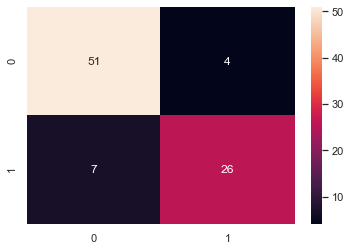

In [8]:
y_pred = classifier1.predict(x_test) 

sns.set() 
CM= confusion_matrix(y_test, y_pred, labels=None, sample_weight=None) 
sns.heatmap(CM, annot=True)